<a href="https://colab.research.google.com/github/KarlaBalog/Tarea_18/blob/principal/Clase_del_19_10_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mplot3d-dragger

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Aquí se importan las librerias principales

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D
from termcolor import colored as cl

Aqui se importan las librerias para el aprendizaje automatizado

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Se configuran las opciones o algunas de las opciones de matplotlib

In [5]:
plt.rcParams["figure.figsize"]=(20,10)
sb.set_style("whitegrid")

aqui se importan los datos desde el archivo csv

In [6]:
from google.colab import files #Sirve para cargar archivos desde el disco duro a google colab
import io
uploaded = files.upload()

Saving cust_seg.csv to cust_seg.csv


In [8]:
df = pd.read_csv("cust_seg.csv")
df

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...,...,...
845,845,846,27,1,5,26,0.548,1.220,NaN,6.8
846,846,847,28,2,7,34,0.359,2.021,0.0,7.0
847,847,848,25,4,0,18,2.802,3.210,1.0,33.4
848,848,849,32,1,12,28,0.116,0.696,0.0,2.9


In [9]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,6.8
846,847,28,2,7,34,0.359,2.021,0.0,7.0
847,848,25,4,0,18,2.802,3.210,1.0,33.4
848,849,32,1,12,28,0.116,0.696,0.0,2.9


In [10]:
df.set_index("Customer Id", inplace = True)
df

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3
2,47,1,26,100,4.582,8.218,0.0,12.8
3,33,2,10,57,6.111,5.802,1.0,20.9
4,29,2,4,19,0.681,0.516,0.0,6.3
5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...
846,27,1,5,26,0.548,1.220,NaN,6.8
847,28,2,7,34,0.359,2.021,0.0,7.0
848,25,4,0,18,2.802,3.210,1.0,33.4


count    850.000000
mean      35.029412
std        8.041432
min       20.000000
25%       29.000000
50%       34.000000
75%       41.000000
max       56.000000
Name: Age, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


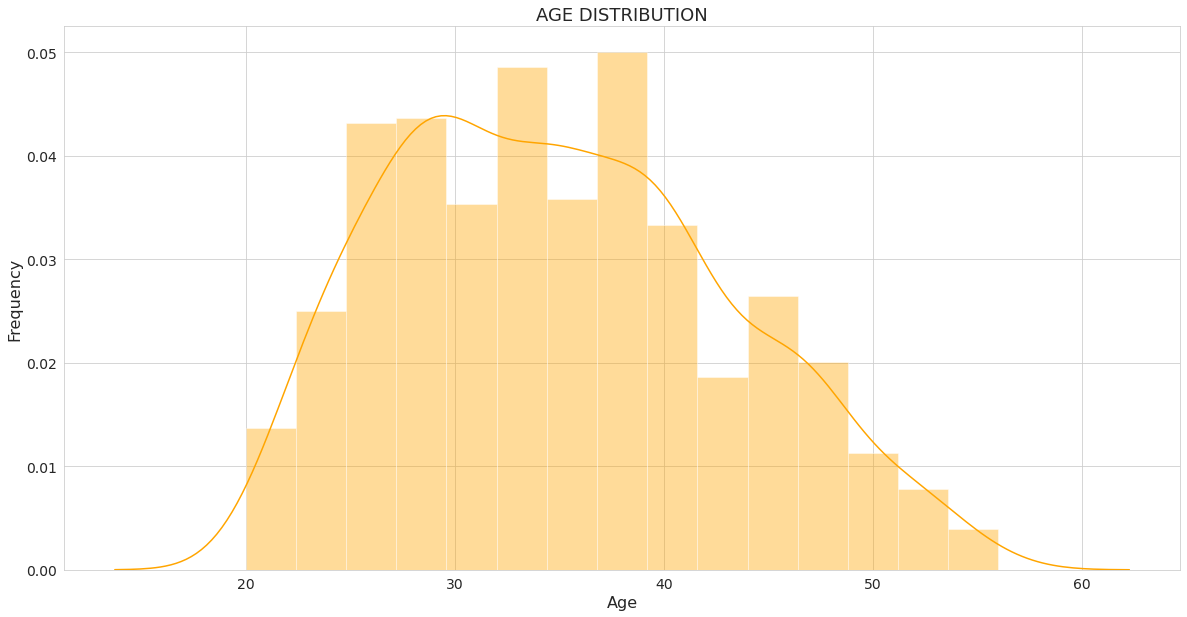

In [11]:
print(cl(df['Age'].describe(), attrs = ['bold']))

sb.distplot(df['Age'], 
            color = 'orange')
plt.title('AGE DISTRIBUTION', 
          fontsize = 18)
plt.xlabel('Age', 
           fontsize = 16)
plt.ylabel('Frequency', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('age_distribution.png')
plt.show()

.......................................
Number of Default cases are 183
.......................................
Number of Non-Default cases are 517
.......................................
Percentage of Default cases is 35%
.......................................


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


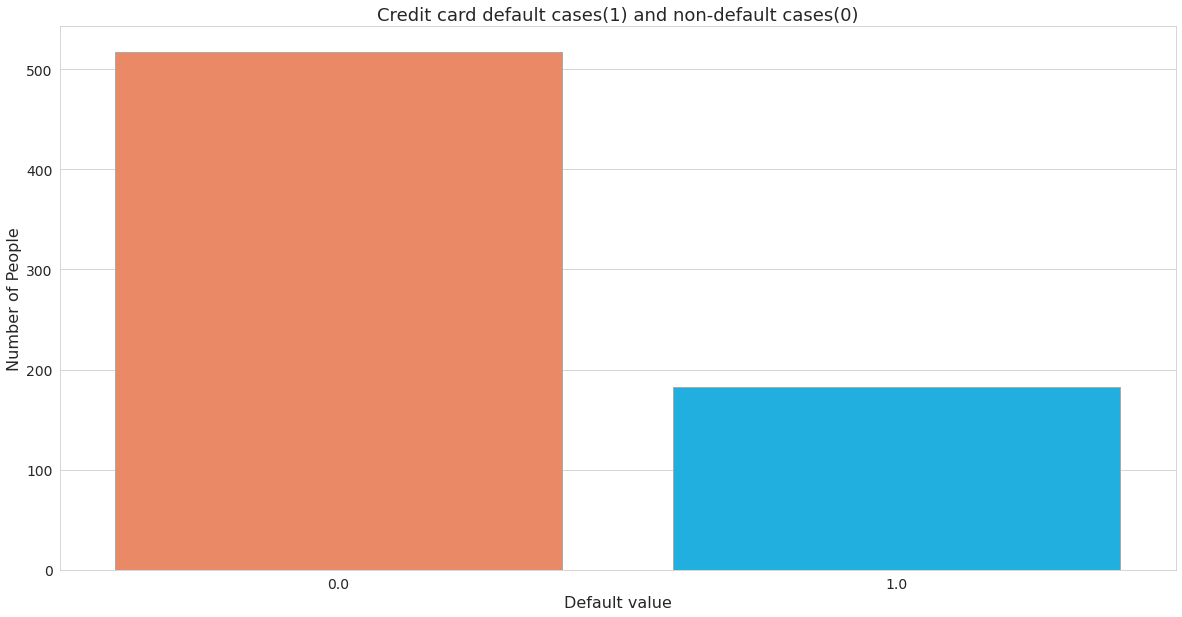

In [12]:
# Credit card default cases

default = df[df['Defaulted'] == 1.0]
non_default = df[df['Defaulted'] == 0.0]

print(cl('.......................................', attrs = ['bold']))
print(cl('Number of Default cases are {}'.format(len(default)), attrs = ['bold']))
print(cl('.......................................', attrs = ['bold']))
print(cl('Number of Non-Default cases are {}'.format(len(non_default)), attrs = ['bold']))
print(cl('.......................................', attrs = ['bold']))
print(cl('Percentage of Default cases is {:.0%}'.format(len(default)/len(non_default)), attrs = ['bold']))
print(cl('.......................................', attrs = ['bold']))

sb.countplot(df['Defaulted'], 
             palette = ['coral', 'deepskyblue'], 
             edgecolor = 'darkgrey')
plt.title('Credit card default cases(1) and non-default cases(0)', 
          fontsize = 18)
plt.xlabel('Default value', 
           fontsize = 16)
plt.ylabel('Number of People', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('default_cases.png')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


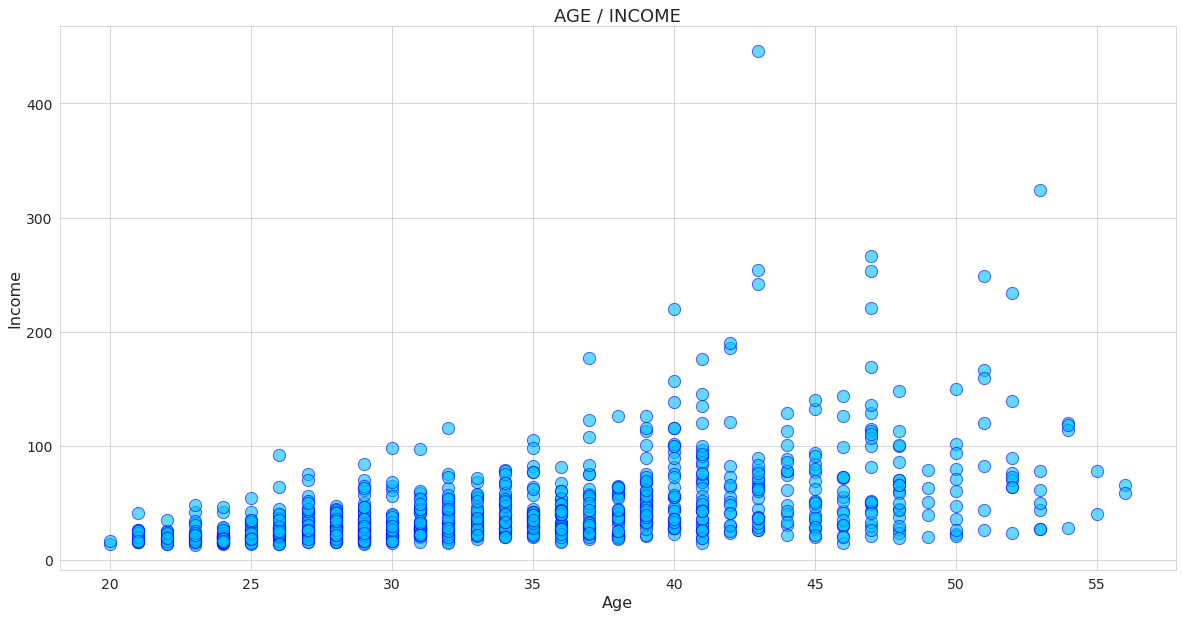

In [13]:
# Age vs Income

sb.scatterplot('Age', 'Income', 
               data = df, 
               color = 'deepskyblue', 
               s = 150, 
               alpha = 0.6, 
               edgecolor = 'b')
plt.title('AGE / INCOME', 
          fontsize = 18)
plt.xlabel('Age', 
           fontsize = 16)
plt.ylabel('Income', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('age_income.png')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


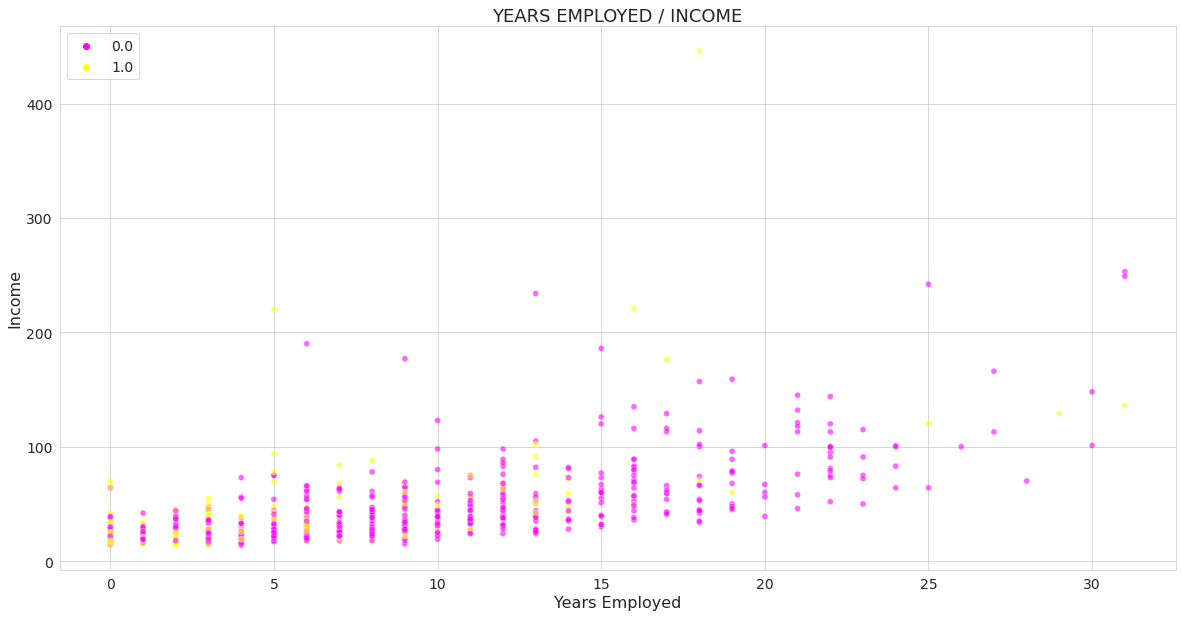

In [14]:
# Years Employed vs Income

area = df.DebtIncomeRatio**2

sb.scatterplot('Years Employed', 'Income', 
               data = df,  
               alpha = 0.6, 
               edgecolor = 'white', 
               hue = 'Defaulted', 
               palette = 'spring')
plt.title('YEARS EMPLOYED / INCOME', 
          fontsize = 18)
plt.xlabel('Years Employed', 
           fontsize = 16)
plt.ylabel('Income', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc = 'upper left', fontsize = 14)

plt.savefig('y_income.png')
plt.show()

Se va a hacer una normalización para la escala estándar

DataFrame: estructura en donde te puede dar filas o columnas, se las puedes pedir de acuerdo a condiciones

In [15]:
#.values lo que va a devolver es un n.array
x=df.values
x= np.nan_to_num(x) #no altera la original

sc=StandardScaler()
cluster_data=sc.fit_transform(x)
cluster_data
#p= df.isnull().sum()
#df.info()

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [16]:
print(cl("cluster_data samples:", attrs=["bold"]), cluster_data[:5])

cluster_data samples: [[ 0.74291541  0.31212243 -0.37878978 -0.71845859 -0.68381116 -0.59048916
  -0.52379654 -0.57652509]
 [ 1.48949049 -0.76634938  2.5737211   1.38432469  1.41447366  1.51296181
  -0.52379654  0.39138677]
 [-0.25251804  0.31212243  0.2117124   0.26803233  2.13414111  0.80170393
   1.90913822  1.59755385]
 [-0.75023477  0.31212243 -0.67404087 -0.71845859 -0.42164323 -0.75446707
  -0.52379654 -0.57652509]
 [ 1.48949049 -0.76634938  3.31184882  5.35624866  3.63890032  1.71609424
  -0.52379654 -0.44250653]]


In [17]:
k=3
model=KMeans(init="k-means++", n_clusters=k, n_init=2022)
model.fit(x)
labels=model.labels_
print(cl(labels[:100], attrs=["bold"]))

[0 2 0 0 1 2 0 2 0 2 2 0 0 0 0 0 0 0 2 0 0 0 0 2 2 2 0 0 2 0 2 0 0 0 0 0 0
 0 0 2 0 2 0 1 0 2 0 0 0 2 2 0 0 2 2 0 0 0 2 0 2 0 2 2 0 0 2 0 0 0 2 2 2 0
 0 0 0 0 2 0 2 2 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0]


In [18]:
df["cluster"]=labels
df

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
Customer Id,,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3,0
2,47,1,26,100,4.582,8.218,0.0,12.8,2
3,33,2,10,57,6.111,5.802,1.0,20.9,0
4,29,2,4,19,0.681,0.516,0.0,6.3,0
5,47,1,31,253,9.308,8.908,0.0,7.2,1
...,...,...,...,...,...,...,...,...,...
846,27,1,5,26,0.548,1.220,NaN,6.8,0
847,28,2,7,34,0.359,2.021,0.0,7.0,0
848,25,4,0,18,2.802,3.210,1.0,33.4,0


In [19]:
df.groupby("cluster").mean()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
cluster,,,,,,,,
0,32.967692,1.613846,6.389231,31.204615,1.032711,2.108345,0.284658,10.095385
1,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
2,41.368132,1.961538,15.252747,84.076923,3.114412,5.770352,0.172414,10.725824
